<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-12-16 01:31:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  59.0MB/s    in 3.4s    

2025-12-16 01:31:17 (59.8 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 152.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 134.0 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 124.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 122.3 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


8227     1.000000e+150
19830     1.000000e+65
9886      1.000000e+53
5090      1.000000e+44
11532     8.000000e+27
14519     1.000000e+20
15892     1.111111e+15
29531     3.040302e+14
26746     7.587459e+13
32526     7.777778e+12
121       1.000000e+11
5662      5.000000e+10
20112     5.000000e+10
20841     4.800000e+10
19198     3.000000e+10
24011     3.000000e+10
28429     2.040000e+10
6441      1.860000e+10
28919     1.660000e+10
22444     1.500000e+10
Name: CompTotal, dtype: float64


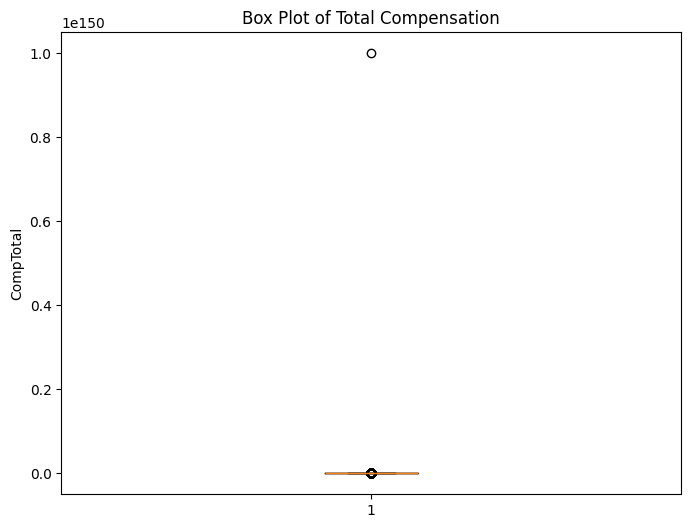

In [5]:
# your code goes here
QUERY = """ 
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND CompTotal > 0
"""
df_CompTotal = pd.read_sql_query(QUERY, conn)

## We find that the top 11 compensation data points are skewing the data:
CompTotal = df_CompTotal['CompTotal'].nlargest(20)
print(CompTotal)

## We plot anyway because we're looking for outliers
plt.figure(figsize=(8,6))
plt.boxplot(df_CompTotal)
plt.title('Box Plot of Total Compensation')
plt.ylabel('CompTotal')
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


Age               
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64 




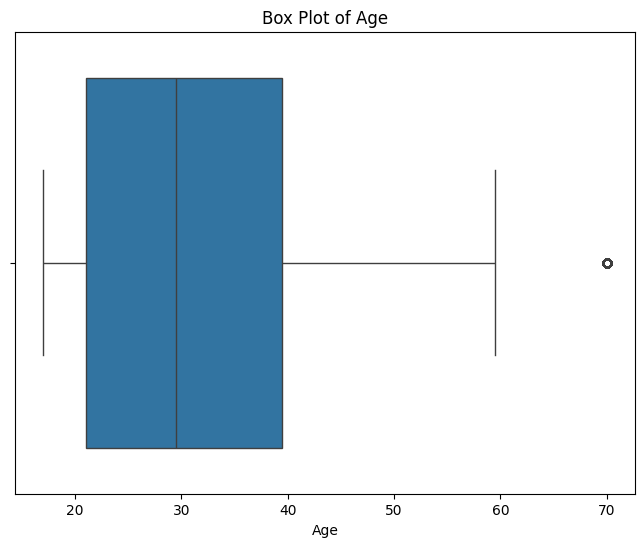

In [10]:
# your code goes here
import numpy as np
import seaborn as sns
QUERY = """ 
SELECT Age 
FROM main
WHERE Age IS NOT NULL
""" 
df_Age_Numeric = pd.read_sql_query(QUERY, conn)

## We see that Age_Numeric is mapped as strings
print(df_Age_Numeric.value_counts(), "\n\n")

# Define a mapping from age group strings to numeric midpoints, then apply the mapping to numerical values
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,
    "Prefer not to say": np.nan
}
df_Age_Numeric['Age_Numeric'] = df_Age_Numeric['Age'].map(age_map)

plt.figure(figsize=(8,6))
sns.boxplot(x=df_Age_Numeric['Age_Numeric'])  
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


8227     1.000000e+150
19830     1.000000e+65
9886      1.000000e+53
5090      1.000000e+44
11532     8.000000e+27
14519     1.000000e+20
15892     1.111111e+15
29531     3.040302e+14
26746     7.587459e+13
32526     7.777778e+12
121       1.000000e+11
5662      5.000000e+10
20112     5.000000e+10
20841     4.800000e+10
19198     3.000000e+10
24011     3.000000e+10
28429     2.040000e+10
6441      1.860000e+10
28919     1.660000e+10
22444     1.500000e+10
Name: CompTotal, dtype: float64 


          CompTotal              Age
121    1.000000e+11  35-44 years old
5662   5.000000e+10  55-64 years old
20112  5.000000e+10  18-24 years old
20841  4.800000e+10  25-34 years old
19198  3.000000e+10  25-34 years old
24011  3.000000e+10  25-34 years old
28429  2.040000e+10  25-34 years old
6441   1.860000e+10  35-44 years old
28919  1.660000e+10  25-34 years old
22444  1.500000e+10  35-44 years old 




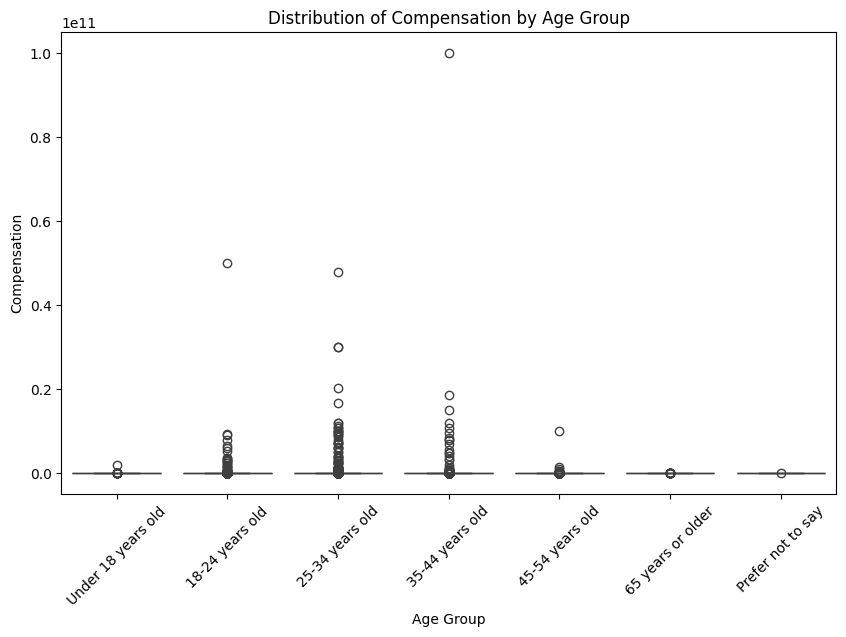

In [11]:
# your code goes here
QUERY = """ 
SELECT CompTotal, Age 
FROM main
WHERE CompTotal IS NOT NULL AND CompTotal > 0
AND Age IS NOT NULL
""" 
df_Age_Groups = pd.read_sql_query(QUERY, conn)

## We see the top 10 CompTotal values are outliers
print(df_Age_Groups['CompTotal'].nlargest(20), "\n\n")

## Drop Top 10 CompTotal entries
top10_idx = df_Age_Groups['CompTotal'].nlargest(10).index
df_Age_Groups = df_Age_Groups.drop(top10_idx)
print(df_Age_Groups.nlargest(10, 'CompTotal'), "\n\n")

## Define the age order and order the plotting by that order
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "65 years or older",
    "Prefer not to say"
]

plt.figure(figsize=(10,6))
sns.boxplot(x='Age', y='CompTotal', data=df_Age_Groups, order=age_order)
plt.title('Distribution of Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Compensation')
plt.xticks(rotation=45)
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


Top 20 CompTotal: 
 5750     1.000000e+150
13621     1.000000e+65
6865      1.000000e+53
3517      1.000000e+44
8022      8.000000e+27
10078     1.000000e+20
11009     1.111111e+15
14297     4.800000e+10
13209     3.000000e+10
19234     2.040000e+10
19579     1.660000e+10
15397     1.500000e+10
2962      1.200000e+10
9241      1.200000e+10
13823     1.200000e+10
7367      1.080000e+10
21410     1.080000e+10
3447      1.000000e+10
5783      1.000000e+10
9827      1.000000e+10
Name: CompTotal, dtype: float64 


New top 10: 
           CompTotal  JobSat
19579  1.660000e+10    10.0
15397  1.500000e+10     8.0
2962   1.200000e+10     8.0
9241   1.200000e+10     8.0
13823  1.200000e+10     8.0
7367   1.080000e+10     9.0
21410  1.080000e+10     7.0
3447   1.000000e+10     8.0
5783   1.000000e+10     7.0
9827   1.000000e+10     7.0 




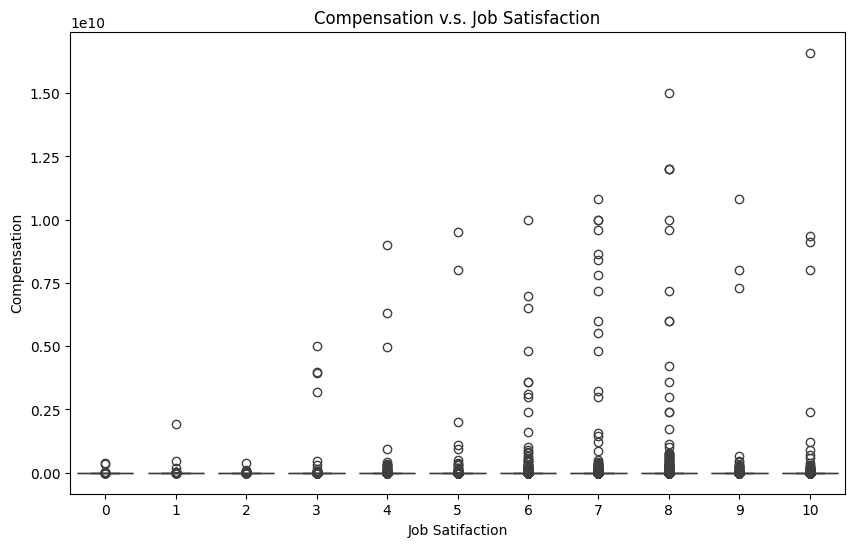

In [12]:
# your code goes here
QUERY = """ 
SELECT CompTotal, JobSat
FROM main
WHERE CompTotal IS NOT NULL AND CompTotal > 0
AND JobSat IS NOT NULL
""" 
df_sat = pd.read_sql_query(QUERY, conn)

## We see the top 10 CompTotal values are outliers
print("Top 20 CompTotal: \n", df_sat['CompTotal'].nlargest(20), "\n\n")

## Drop Top 10 CompTotal entries
top10_idx = df_sat['CompTotal'].nlargest(10).index
df_sat = df_sat.drop(top10_idx)
print("New top 10: \n", df_sat.nlargest(10, 'CompTotal'), "\n\n")

## Convert JobSat to integers
df_sat['JobSat'] = df_sat['JobSat'].astype(int)

## Order JobSat
order = list(range(0,11))

plt.figure(figsize=(10,6))
sns.boxplot(x="JobSat", y="CompTotal", data=df_sat, order=order)
plt.title("Compensation v.s. Job Satisfaction")
plt.xlabel("Job Satifaction")
plt.ylabel("Compensation")
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


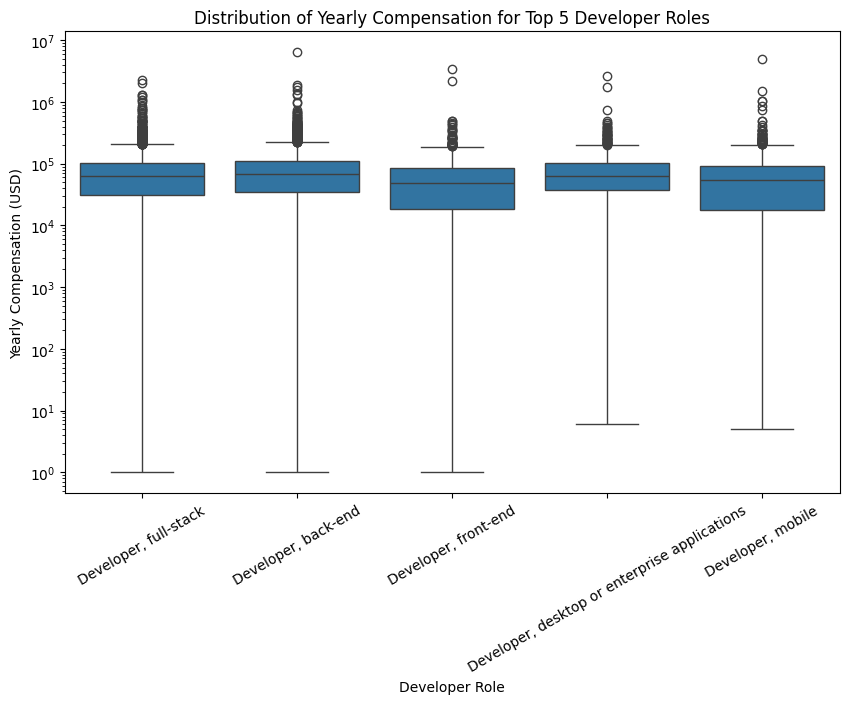

In [25]:
# your code goes here
QUERY = """ 
SELECT ConvertedCompYearly, DevType
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND ConvertedCompYearly > 0
AND DevType IS NOT NULL
"""
df_convert = pd.read_sql_query(QUERY, conn)

## Get top 5 developer roles
top5_roles = df_convert['DevType'].value_counts().head(5).index

## Make new dataframe with the top 5 roles filtered in
df_top5 = df_convert[df_convert['DevType'].isin(top5_roles)]

plt.figure(figsize=(10,6))
sns.boxplot(x="DevType", y="ConvertedCompYearly", data=df_top5, order=top5_roles)
plt.title("Distribution of Yearly Compensation for Top 5 Developer Roles")
plt.xlabel("Developer Role")
plt.ylabel("Yearly Compensation (USD)")
plt.xticks(rotation=30)  
plt.yscale('log')        
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


386         Slovakia
482         Slovakia
483      Afghanistan
658      Afghanistan
745         Slovakia
            ...     
32825       Slovakia
32954       Slovakia
32956    Afghanistan
33032       Slovakia
33573       Slovakia
Name: Country, Length: 171, dtype: object


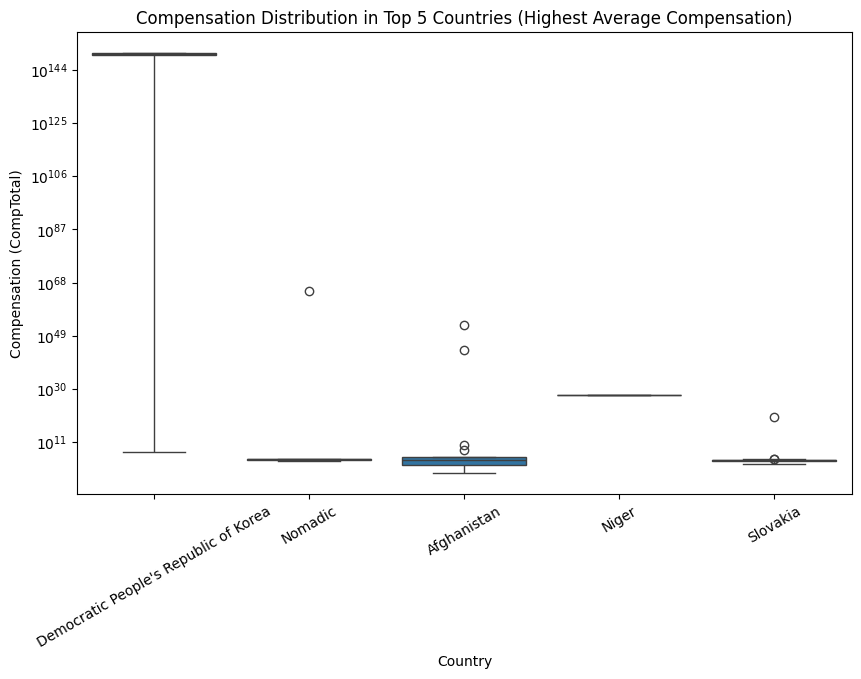

In [34]:
# your code goes here
QUERY = """ 
SELECT CompTotal, Country
FROM main
WHERE CompTotal IS NOT NULL AND CompTotal > 0
AND Country IS NOT NULL
"""
df_country = pd.read_sql_query(QUERY, conn)

## Filter for top 5 Countries based 
avg_comp = df_country.groupby('Country')['CompTotal'].mean().sort_values(ascending=False)
top5 = avg_comp.head(5).index
df_country_2 = df_country[df_country['Country'].isin(top5)]

print(df_country_2['Country'])

plt.figure(figsize=(10,6))
sns.boxplot(x="Country", y="CompTotal", data=df_country_2, order=top5)
plt.title("Compensation Distribution in Top 5 Countries (Highest Average Compensation)")
plt.xlabel("Country")
plt.ylabel("Compensation (CompTotal)")
plt.xticks(rotation=30)
plt.yscale('log')
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


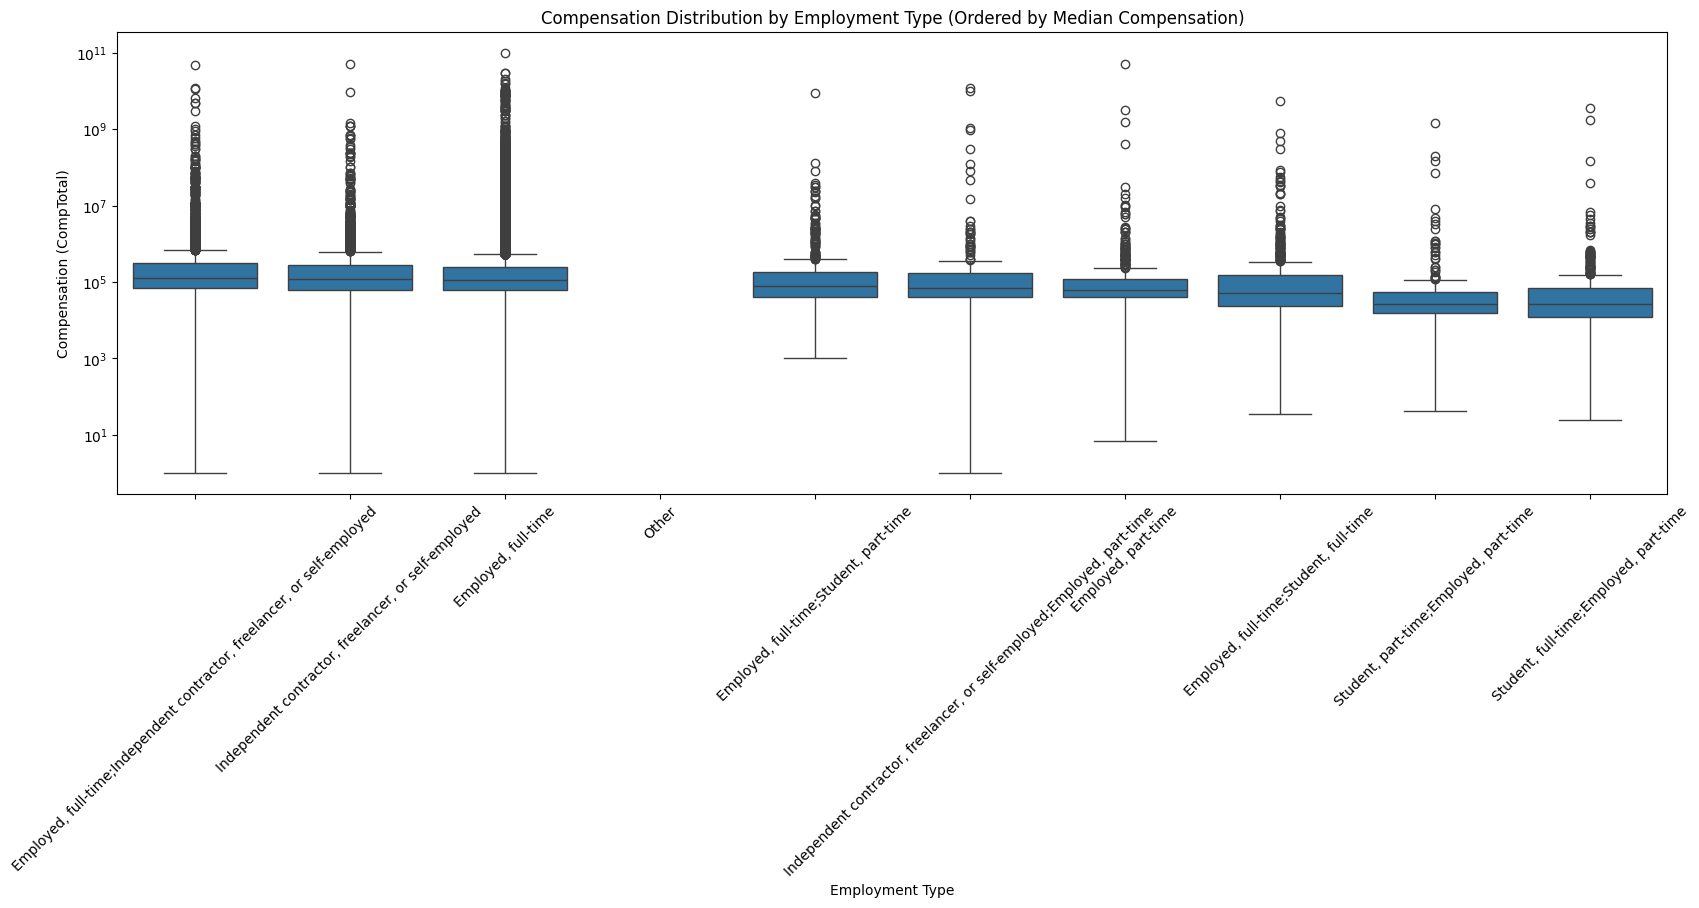

In [46]:
# your code goes here
QUERY = """ 
SELECT CompTotal, Employment
FROM main
WHERE CompTotal IS NOT NULL AND CompTotal > 0
AND Employment IS NOT NULL
"""
df_employment = pd.read_sql_query(QUERY, conn)

## Find 9 most frequent employment types
top9 = df_employment['Employment'].value_counts().head(9).index 
df_employment['Employment_grouped'] = df_employment['Employment'].apply(lambda x: x if x in top9 else "Other")

## Compute median compensation per Employment type
employment_order = (
    df_employment.groupby('Employment_grouped')['CompTotal'].median().sort_values(ascending=False).index
)

## Drop top 10 outliers of CompTotal
Outliers = df_employment['CompTotal'].nlargest(10).index
df_employment_final = df_employment.drop(Outliers)

plt.figure(figsize=(20,6))
sns.boxplot(x="Employment", y="CompTotal", data=df_employment_final, order=employment_order)
plt.title("Compensation Distribution by Employment Type (Ordered by Median Compensation)")
plt.xlabel("Employment Type")
plt.ylabel("Compensation (CompTotal)")
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


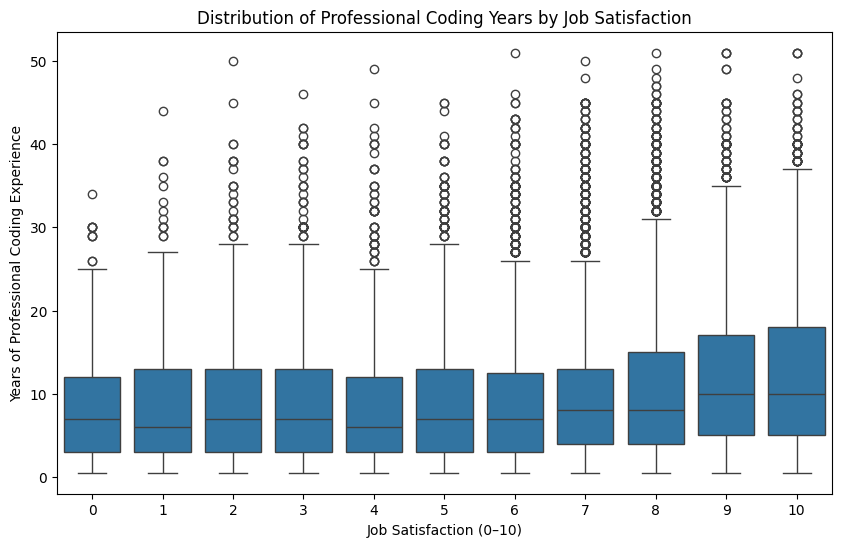

In [55]:
# your code goes here
QUERY = """
SELECT YearsCodePro, JobSat
FROM main
WHERE YearsCodePro IS NOT NULL AND YearsCodePro > 0
AND JobSat IS NOT NULL AND JobSat > -1 AND JobSat < 13
"""
df_years = pd.read_sql_query(QUERY, conn)

## Convert JobSat to integers
df_years['JobSat'] = df_years['JobSat'].astype(int)

## Order JobSat
order = list(range(0,11))

# Create a mapping dictionary for the special cases
mapping = {
    "Less than 1 year": 0.5,
    "More than 50 years": 51
}

# Convert column: map special cases, then coerce others to numeric
df_years['YearsCodePro'] = (
    df_years['YearsCodePro'].map(mapping).fillna(df_years['YearsCodePro'])
)

# Convert remaining values to numeric
df_years['YearsCodePro'] = pd.to_numeric(df_years['YearsCodePro'], errors='coerce')

plt.figure(figsize=(10,6))
sns.boxplot(x="JobSat", y="YearsCodePro", data=df_years, order=order)
plt.title("Distribution of Professional Coding Years by Job Satisfaction")
plt.xlabel("Job Satisfaction (0–10)")
plt.ylabel("Years of Professional Coding Experience")
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [56]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
